In [2]:
pip install nltk

     ---------------------------------------- 0.0/41.5 kB ? eta -:--:--
     ---------------------------------------- 0.0/41.5 kB ? eta -:--:--
     ---------------------------------------- 0.0/41.5 kB ? eta -:--:--
     ---------------------------------------- 0.0/41.5 kB ? eta -:--:--
     ---------------------------------------- 0.0/41.5 kB ? eta -:--:--
     ---------------------------------------- 0.0/41.5 kB ? eta -:--:--
     ---------------------------------------- 41.5/41.5 kB 2.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   --


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
sentiment
positive    25000
negative    25000
Name: count, dtype: int64
0


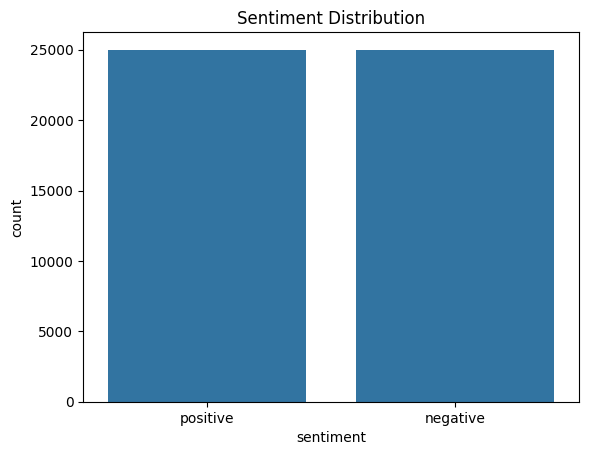

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\Muhamad/nltk_data'
    - 'c:\\Users\\Muhamad\\AppData\\Local\\Programs\\Python\\Python312\\nltk_data'
    - 'c:\\Users\\Muhamad\\AppData\\Local\\Programs\\Python\\Python312\\share\\nltk_data'
    - 'c:\\Users\\Muhamad\\AppData\\Local\\Programs\\Python\\Python312\\lib\\nltk_data'
    - 'C:\\Users\\Muhamad\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [5]:
# Import libraries
import pandas as pd
import numpy as np
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

# Download NLTK data with error handling
try:
    nltk.data.find('tokenizers/punkt')
    nltk.data.find('corpora/stopwords')
except LookupError:
    print("Downloading required NLTK data...")
    nltk.download('punkt')
    nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

# Step 1: Load and Explore Data
url = "https://raw.githubusercontent.com/Ankit152/IMDB-sentiment-analysis/master/IMDB-Dataset.csv"
data = pd.read_csv(url)

# Check for missing values and data types
print(data.head())
print(data['sentiment'].value_counts())
print(data['review'].isnull().sum())  # Check for NaN in reviews

# Visualize sentiment distribution
sns.countplot(x='sentiment', data=data)
plt.title('Sentiment Distribution')
plt.show()

# Step 2: Data Preprocessing
def clean_text(text):
    if not isinstance(text, str):  # Handle non-string values (e.g., NaN)
        text = str(text) if pd.notnull(text) else ''
    text = re.sub(r'[^\w\s]', '', text.lower())  # Remove punctuation, lowercase
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return ' '.join(tokens)

# Apply cleaning and handle missing values
data['review'] = data['review'].fillna('')  # Replace NaN with empty string
data['review'] = data['review'].apply(clean_text)

# Convert text to TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data['review']).toarray()
y = data['sentiment'].map({'positive': 1, 'negative': 0})

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 4: Evaluate Model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f"F1-Score: {f1:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Step 5: Predict on a sample review
sample_review = ["This movie was amazing and full of surprises!"]
sample_cleaned = [clean_text(sample_review[0])]
sample_tfidf = vectorizer.transform(sample_cleaned).toarray()
prediction = model.predict(sample_tfidf)
print(f"Sample Review Prediction: {'Positive' if prediction[0] == 1 else 'Negative'}")